# JV sweep simulation

In [1]:
import os, sys
from functools import partial
try:
    import pySIMsalabim as sim
except ImportError: # add parent directory to sys.path if pySIMsalabim is not installed
    sys.path.append('..')
    import pySIMsalabim as sim
from pySIMsalabim.experiments.JV_sweep import *

### Setup the simulation

In [2]:
# Set the path to the simulation setup file
cwd = os.path.abspath('..')
session_path = os.path.join(cwd, 'SIMsalabim','ZimT')
zimt_device_parameters = os.path.join(session_path, 'simulation_setup.txt')

# Set the JV sweep simulation parameters
scan_speed = 10
direction = 1
G_frac = 1
tVG_name = os.path.join(session_path,'tVG.txt')
Vmin = 0.0
Vmax = 1.25
steps = 100
# Run the JV sweep simulation
# Note: JV sweep simulations are different from the run_SS_JV simulations. JV_sweep by default runs a transient simulation (i.e. using zimt) to get the JV curve, while run_SS_JV runs a steady-state simulation (i.e. using simss) to get the JV curve. 
# you can also run the steady-state JV using JV_sweep by setting stabilized=True

# stabilized run
ret, mess, rms = JV_sweep(zimt_device_parameters, session_path, 0, scan_speed, direction, G_frac, tVG_name, run_mode=False, Vmin=Vmin, Vmax=Vmax, steps = steps, expJV_Vmin_Vmax='', expJV_Vmax_Vmin='',rms_mode='lin',threadsafe=False, stabilized=True,tj_name=os.path.join(session_path,'tj_stabilized.txt'))

# transient run
ret, mess, rms = JV_sweep(zimt_device_parameters, session_path, 0, scan_speed, direction, G_frac, tVG_name, run_mode=False, Vmin=Vmin, Vmax=Vmax, steps = steps, expJV_Vmin_Vmax='', expJV_Vmax_Vmin='',rms_mode='lin',threadsafe=False, stabilized=False,tj_name=os.path.join(session_path,'tj_transient.txt'))


### Plot results

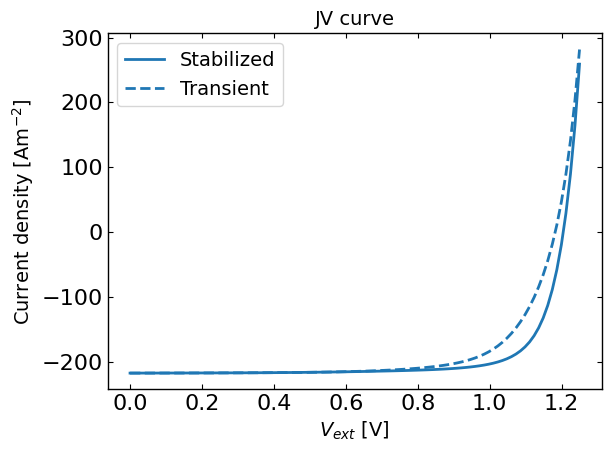

In [3]:
data_tj_stabilized = pd.read_csv(os.path.join(session_path,'tj_stabilized.txt'), sep=r'\s+')
data_tj_transient = pd.read_csv(os.path.join(session_path,'tj_transient.txt'), sep=r'\s+')

fig, ax = plt.subplots()
pars1 = {'Jext' : 'Stabilized'} #'$J_{ext}$'}
pars2 = {'Jext' : 'Transient'} #'$J_{ext}$'}
par_x = 'Vext'
xlabel = '$V_{ext}$ [V]'
ylabel = 'Current density [Am$^{-2}$]'
xscale = 'linear'
yscale = 'linear'
title = 'JV curve'
plot_type = plt.plot

ax = utils_plot.plot_result(data_tj_stabilized, pars1, list(pars1.keys()), par_x, xlabel, ylabel, xscale, yscale, title, ax, plot_type)
ax = utils_plot.plot_result(data_tj_transient, pars2, list(pars2.keys()), par_x, xlabel, ylabel, xscale, yscale, title, ax, partial(plot_type,linestyle='--'))
plt.tight_layout() # make it fit in the window
    

In [4]:
# Clean up the output files (comment out if you want to keep the output files)
sim.clean_all_output(session_path)
sim.delete_folders('tmp',session_path)